# Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

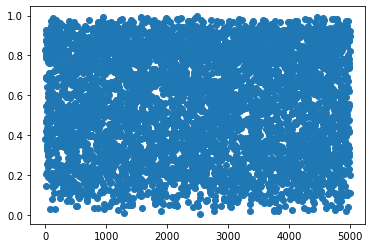

In [2]:
# insert code here

plt.scatter(x=range(len(results['prob'])), y=results['prob'])
plt.show()

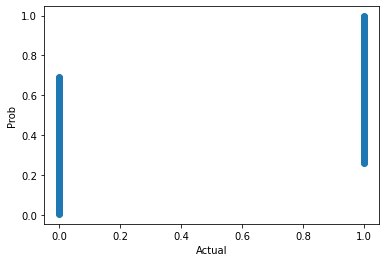

In [3]:
plt.scatter(results['actual'], results['prob'])
plt.xlabel('Actual')
plt.ylabel('Prob')
plt.show()

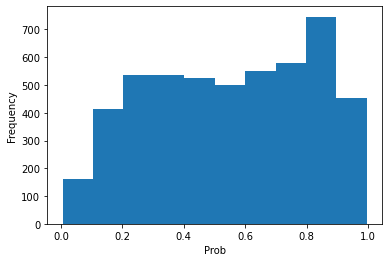

In [4]:
plt.hist(results['prob'], bins=10)
plt.xlabel('Prob')
plt.ylabel('Frequency')
plt.show()

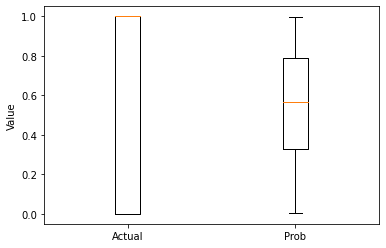

In [5]:
plt.boxplot([results['actual'], results['prob']])
plt.xticks([1, 2], ['Actual', 'Prob'])
plt.ylabel('Value')
plt.show()

Insert comments here

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

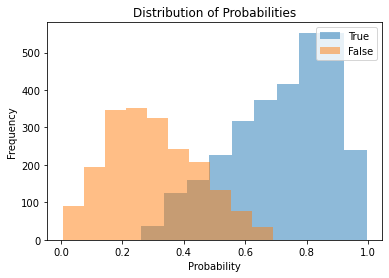

In [6]:
# insert code here

# separate data into two groups based on 'actual'
true_probs = results[results['actual'] == 1]['prob']
false_probs = results[results['actual'] == 0]['prob']

# plot histograms
plt.hist(true_probs, alpha=0.5, label='True')
plt.hist(false_probs, alpha=0.5, label='False')

# add title and labels
plt.title('Distribution of Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# show plot
plt.show()

We know the probability lies between 0 to 1.

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [7]:
# insert code here
from sklearn.metrics import confusion_matrix
predicted = [1 if p >= 0.5 else 0 for p in results['prob']]

# create confusion matrix using scikit-learn
confusion_mat = confusion_matrix(results['actual'], predicted)
print(confusion_mat)

[[1790  210]
 [ 377 2623]]


The confusion matrix function from the sklearn.metrics module is imported in this code. Applying a threshold of 0.5 to the probabilities produced by the model, it then constructs a list of predicted values by converting values more than or equal to 0.5 to 1, and values less than 0.5 to 0.

The target variable's actual values and the model's predicted values are the two inputs given to the confusion matrix function. The total number of true positives, true negatives, false positives, and false negatives are calculated and summarized in a confusion matrix.


The confusion matrix is printed by the code at the end. The results demonstrate that there were 2623 real positives, 210 false positives, 377 false negatives, and 1790 true negatives (TP).

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [8]:
# insert code here
TP= confusion_mat[0,0]
FN= confusion_mat[0,1]
FP= confusion_mat[1,0]
TN= confusion_mat[1,1]
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = (TP)/(TP+FP)
Recall = (TP)/(TP+FN)
print('Accuracy =', Accuracy)
print('Precision =', Precision)
print('Recall =', Recall)

Accuracy = 0.8826
Precision = 0.8260267651130595
Recall = 0.895


The unique challenge, the top priorities, and the environment in which the model is being utilized all influence the choice of performance statistic. In general, it is crucial to take into account the trade-offs between Precision and Recall because they might frequently be at odds with one another.
Accuracy is a suitable metric in this situation if the cost of false positives (Type I mistakes) and false negatives (Type II errors) is equal. Nevertheless, Precision or Recall should be taken into account if the costs of false positives and false negatives differ.

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

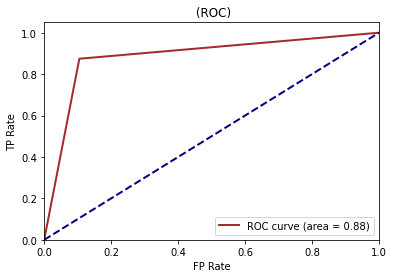

In [9]:
# Insert code here
from sklearn.metrics import roc_curve, auc

# Convert continuous values to binary labels using a threshold of 0.5
predicted_labels = [1 if p >= 0.5 else 0 for p in results['prob']]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(results['actual'], predicted_labels)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='brown', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title(' (ROC)')
plt.legend(loc="lower right")
plt.show()

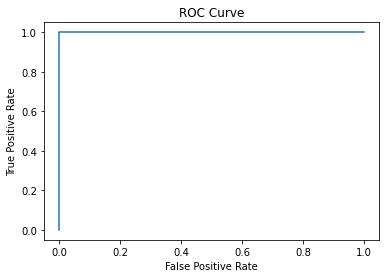

In [13]:
actual = np.array([0, 1, 1, 1, 1])
prob = np.array([0.380052, 0.827923, 0.929093, 0.472508, 0.906988])

n = len(actual) # Total number of observations
sorted_probs = sorted(zip(prob, actual), reverse=True) # Sort probabilities in descending order

TP = 0 # True Positives
FP = 0 # False Positives
TN = sum(actual == 0) # True Negatives
FN = sum(actual == 1) - TP # False Negatives
TPR_list = [] # True Positive Rate
FPR_list = [] # False Positive Rate

for prob, true_label in sorted_probs:
    if true_label == 1:
        TP += 1
        FN = sum(actual == 1) - TP
    else:
        FP += 1
        TN -= 1
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TPR_list.append(TPR)
    FPR_list.append(FPR)

# Add (0,0) and (1,1) points to the ROC curve
TPR_list.insert(0, 0)
FPR_list.insert(0, 0)
TPR_list.append(1)
FPR_list.append(1)

# Plot the ROC curve
plt.plot(FPR_list, TPR_list)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In machine learning, the ROC (Receiver Operating Characteristic) is a popular assessment statistic, especially for binary classification issues. In a curve for various classification thresholds, the true positive rate (TPR) is plotted against the false positive rate (FPR).

The TPR measures how many true positive predictions (i.e., positive cases the model correctly predicted) there were out of all actual positive cases, while the FPR measures how many false positive predictions (i.e., positive cases the model incorrectly predicted) there were out of all actual negative cases. The trade-off between these two rates is depicted by the ROC curve as the classification threshold is changed.